# RFM analysis for Customer Segmentation

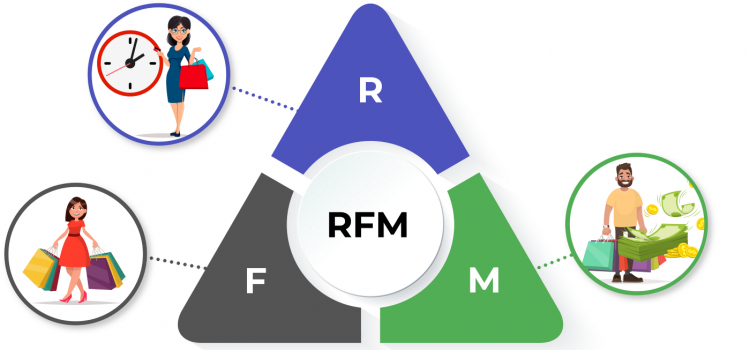

## What is RFM (recency, frequency, monetary) analysis?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."



### RFM analysis ranks each customer on the following factors:

* **Recency**. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.
* **Frequency**. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.
* **Monetary**. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.


* **This simple approach of scaling customers from 1-5 will result in, at the most, 125 different RFM scores (5x5x5), ranging from 111(lowest) to 555(highest)**. Each RFM cell will differ in size and vary from one another, in terms of the customer’s key habits, captured in the RFM score. Obviously, marketers can’t analyze all 125 segments individually if each RFM cell is considered a segment, and it’s difficult and overwhelming to visualize this imaginary 3D cube!

* In general, the monetary aspect of RFM is viewed as an aggregation metric for summarizing transactions or aggregate visit length. **Therefore, these 125 RFM segments are reduced to 25 segments by using just R and F scores.**

# Variables

* **InvoiceNo**: Invoice number. Unique number for each transaction, i.e. invoice. If it starts with C, the canceled transaction.
* **StockCode**: Product code. Unique number for each product.
* **Description**: Product name
* **Quantity**: Product quantity. It expresses how many of the products in the invoices are sold.
* **InvoiceDate**: Invoice date and time.
* **UnitPrice**: Product price (in pounds sterling)
* **CustomerID**: Unique customer number
* **Country**: Country name. The country where the customer lives.



In [122]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [123]:
df=pd.read_csv("../input/onlineretaildata/Online_Retail.csv", encoding= 'unicode_escape')

In [124]:
#let's check which information our data has
def check_df(df):
  print("**********head*************")
  print(df.head())
  print("**********tail*************")
  print(df.tail())
  print("**********info*************")
  print(df.info())
  print("**********columns*************")
  print(df.columns)
  print("**********null_values*************")
  print(df.isnull().values.any())  
  print("**********shape*************")
  print(df.shape)
  print("**********describe*************")
  print(df.describe().T)
  print("**********null_sum*************")
  print(df.isnull().sum())
check_df(df)

**********head*************
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  1/12/2010 8:26      2.550   17850.000  United Kingdom  
1  1/12/2010 8:26      3.390   17850.000  United Kingdom  
2  1/12/2010 8:26      2.750   17850.000  United Kingdom  
3  1/12/2010 8:26      3.390   17850.000  United Kingdom  
4  1/12/2010 8:26      3.390   17850.000  United Kingdom  
**********tail*************
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    5

In [125]:
# let's check which product sells the most
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [126]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.390,17850.000,United Kingdom


In [127]:
#in this project we will not focus on StockCode, Descriptionand Country that's why we will remove them from dataset

df.drop(['StockCode', 'Description','Country'],axis = 1, inplace =True)
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,1/12/2010 8:26,2.550,17850.000
1,536365,6,1/12/2010 8:26,3.390,17850.000
2,536365,8,1/12/2010 8:26,2.750,17850.000
3,536365,6,1/12/2010 8:26,3.390,17850.000
4,536365,6,1/12/2010 8:26,3.390,17850.000


In [128]:
# let's calculate how much we earn from each sale
#Total Price for each sale> Quantity x UnitPrice


df["Total_Price"]=df["Quantity"]*df["UnitPrice"]

In [129]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,1/12/2010 8:26,2.550,17850.000,15.300
1,536365,6,1/12/2010 8:26,3.390,17850.000,20.340
2,536365,8,1/12/2010 8:26,2.750,17850.000,22.000
3,536365,6,1/12/2010 8:26,3.390,17850.000,20.340
4,536365,6,1/12/2010 8:26,3.390,17850.000,20.340


In [130]:
df.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Total_Price         0
dtype: int64

In [131]:
#we will drop all null values
df.dropna(inplace=True)

In [132]:
print("Shape>>",df.shape)
df.isnull().sum()

# now we are sure that we haven't null values

Shape>> (406829, 6)


InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Total_Price    0
dtype: int64

In [133]:
#We excluded those with a "C" in the title, that is, those who were returned.
#We did it in this way otherwise it would break the structure of the data set


df=df[~df["InvoiceNo"].str.contains("C",na=False)]#take all InvoiceNo which has no "C" 
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,1/12/2010 8:26,2.550,17850.000,15.300
1,536365,6,1/12/2010 8:26,3.390,17850.000,20.340
2,536365,8,1/12/2010 8:26,2.750,17850.000,22.000
3,536365,6,1/12/2010 8:26,3.390,17850.000,20.340
4,536365,6,1/12/2010 8:26,3.390,17850.000,20.340


# Calculating RFM Metrics


* **Recency**=Customer's renewal, last purchase date
* **Frequency**=total purchases made 
* **Monetary**=total value of money


* **This simple approach of scaling customers from 1-5 will result in, at the most, 125 different RFM scores (5x5x5), ranging from 111(lowest) to 555(highest)**. Each RFM cell will differ in size and vary from one another, in terms of the customer’s key habits, captured in the RFM score. Obviously, marketers can’t analyze all 125 segments individually if each RFM cell is considered a segment, and it’s difficult and overwhelming to visualize this imaginary 3D cube!
​
* In general, the monetary aspect of RFM is viewed as an aggregation metric for summarizing transactions or aggregate visit length. **Therefore, these 125 RFM segments are reduced to 25 segments by using just R and F scores.**

In [134]:
type(df["InvoiceDate"])#its type should be datetype

# Converting invoice date to date month by importing calander

df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   Quantity     397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   UnitPrice    397924 non-null  float64       
 4   CustomerID   397924 non-null  float64       
 5   Total_Price  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 21.3+ MB


In [135]:
# we need to define the day the analysis was done.
# Find the last date purchased in the data set
# We put 2 days on the most recent date in this data set and consider this date as the date of analysis
# and calculate the recency based on this date.



df["InvoiceDate"].max()# last date purchased

Timestamp('2011-12-10 17:19:00')

In [136]:
today_date=dt.datetime(2011,12,12)#analyzed date we have accepted as today


In [137]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,2010-01-12 08:26:00,2.550,17850.000,15.300
1,536365,6,2010-01-12 08:26:00,3.390,17850.000,20.340
2,536365,8,2010-01-12 08:26:00,2.750,17850.000,22.000
3,536365,6,2010-01-12 08:26:00,3.390,17850.000,20.340
4,536365,6,2010-01-12 08:26:00,3.390,17850.000,20.340


In [138]:
# finding the rfm value of customers


rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),
                                     'Total_Price': lambda Total_Price: Total_Price.sum()})

In [139]:
rfm.head()

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346.000,327,1,77183.600
12347.000,41,7,4310.000
12348.000,77,4,1797.240
12349.000,20,1,1757.550
12350.000,312,1,334.400


In [140]:
rfm.columns=["recency","frequency","monetary"] #change columns name
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.000,327,1,77183.600
12347.000,41,7,4310.000
12348.000,77,4,1797.240
12349.000,20,1,1757.550
12350.000,312,1,334.400


In [141]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.000,106.462,115.083,1.000,23.000,62.000,162.500,698.000
frequency,4339.000,4.272,7.705,1.000,1.000,2.000,5.000,210.000
monetary,4339.000,2053.793,8988.248,0.000,307.245,674.450,1661.640,280206.020


In [142]:
#monetary values should be greater than 0
rfm=rfm[rfm["monetary"]>0]

In [143]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.000,106.483,115.088,1.000,23.000,62.000,162.750,698.000
frequency,4338.000,4.273,7.706,1.000,1.000,2.000,5.000,210.000
monetary,4338.000,2054.266,8989.230,3.750,307.415,674.485,1661.740,280206.020


In [144]:
rfm.shape 

(4338, 3)

# Calculating RFM Scores

In [145]:
#qcut> is the function that divides into quantiles, quarters, which parts to divide  and what to label
# qcut> is the function that divides into quantiles, quarters, which parts to divide and what to label
# and it does this by magnitude, in our example 5 for the best value and 1 for the worst


rfm["recency_score"]=pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1]) 

In [146]:
rfm.head()

,recency,frequency,monetary,recency_score
CustomerID,,,,
12346.000,327,1,77183.600,1
12347.000,41,7,4310.000,4
12348.000,77,4,1797.240,3
12349.000,20,1,1757.550,4
12350.000,312,1,334.400,1


In [147]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
CustomerID,,,,,
12346.000,327,1,77183.600,1,1
12347.000,41,7,4310.000,4,5
12348.000,77,4,1797.240,3,4
12349.000,20,1,1757.550,4,1
12350.000,312,1,334.400,1,1


In [148]:
#5 for the one who brings the most money and 1 for the one who brings the least

rfm["monetary_score"]=pd.qcut(rfm["recency"],5,labels=[1,2,3,4,5]) 
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.000,327,1,77183.600,1,1,5
12347.000,41,7,4310.000,4,5,2
12348.000,77,4,1797.240,3,4,3
12349.000,20,1,1757.550,4,1,2
12350.000,312,1,334.400,1,1,5


* **In general, the monetary aspect of RFM is viewed as an aggregation metric for summarizing transactions or aggregate visit length.Therefore, these 125 RFM segments are reduced to 25 segments by using just R and F scores.**

In [149]:
rfm["RFM_SCORE"]=(rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str))

In [150]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.000,327,1,77183.600,1,1,5,11
12347.000,41,7,4310.000,4,5,2,45
12348.000,77,4,1797.240,3,4,3,34
12349.000,20,1,1757.550,4,1,2,41
12350.000,312,1,334.400,1,1,5,11


In [151]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.000,106.483,115.088,1.000,23.000,62.000,162.750,698.000
frequency,4338.000,4.273,7.706,1.000,1.000,2.000,5.000,210.000
monetary,4338.000,2054.266,8989.230,3.750,307.415,674.485,1661.740,280206.020


In [152]:
rfm[rfm["RFM_SCORE"]=="55"].head()#our best clients are the kings :) the ones who bring in the most money

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12395.000,6,12,3018.630,5,5,1,55
12431.000,3,15,6487.450,5,5,1,55
12433.000,11,7,13375.870,5,5,1,55
12437.000,10,18,4951.410,5,5,1,55
12464.000,12,8,1212.050,5,5,1,55


In [153]:
rfm[rfm["RFM_SCORE"]=="11"].head()#those who bring in the least money

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.000,327,1,77183.600,1,1,5,11
12350.000,312,1,334.400,1,1,5,11
12353.000,206,1,89.000,1,1,5,11
12354.000,234,1,1079.400,1,1,5,11
12361.000,289,1,189.900,1,1,5,11


In [154]:
#regex

# RFM labeling>here we will do filtering
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [194]:
rfm["segment"]=rfm["RFM_SCORE"].replace(seg_map,regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.000,327,1,77183.600,1,1,5,11,hibernating
12347.000,41,7,4310.000,4,5,2,45,loyal_customers
12348.000,77,4,1797.240,3,4,3,34,loyal_customers
12349.000,20,1,1757.550,4,1,2,41,promising
12350.000,312,1,334.400,1,1,5,11,hibernating


In [156]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       65.074   339     1.147   339  503.071   339
at_Risk             172.670   588     2.830   588 1201.911   588
cant_loose          135.206    68     8.235    68 3551.160    68
champions            10.301   665    11.717   665 6288.262   665
hibernating         245.009  1069     1.099  1069  468.183  1069
loyal_customers      43.165   787     6.820   787 3104.712   787
need_attention       64.878   196     2.388   196 1087.415   196
new_customers        12.154    52     1.000    52  342.548    52
potential_loyalists  21.343   478     2.033   478  846.572   478
promising            29.708    96     1.000    96  327.782    96

<AxesSubplot:ylabel='segment'>

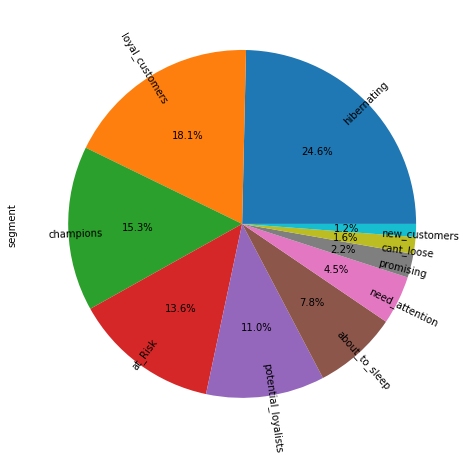

In [179]:
rfm["segment"].value_counts().plot(kind="pie",figsize=(10,8),autopct='%1.1f%%',labeldistance=0.8,rotatelabels=30)

<AxesSubplot:>

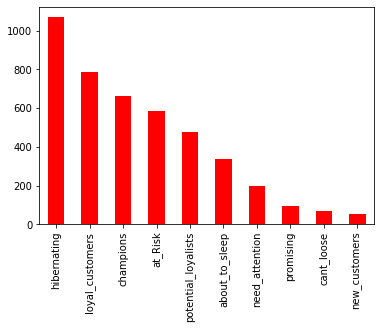

In [169]:
rfm["segment"].value_counts().plot(kind="bar",color="r")

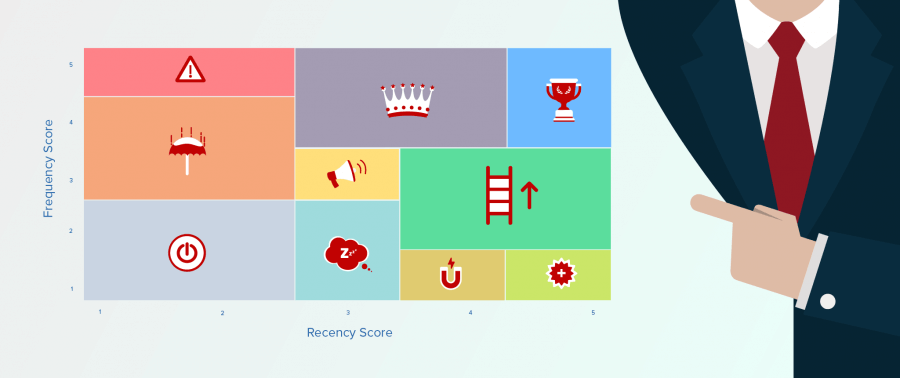

In [157]:
rfm[rfm["segment"]=="cant_loose"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12423.000,90,8,1859.310,2,5,4,25,cant_loose
12637.000,93,8,6021.900,2,5,4,25,cant_loose
12779.000,200,8,3981.360,1,5,5,15,cant_loose
12828.000,114,6,1018.710,2,5,4,25,cant_loose
12830.000,93,6,6814.640,2,5,4,25,cant_loose


In [158]:
rfm[rfm["segment"]=="cant_loose"].index


# we know who they are and their index numbers,so we cant_loose them
#we can do various campaigns to retain them

Float64Index([12423.0, 12637.0, 12779.0, 12828.0, 12830.0, 12853.0, 12949.0,
              12951.0, 13027.0, 13082.0, 13093.0, 13209.0, 13317.0, 13327.0,
              13631.0, 13728.0, 13752.0, 13769.0, 13975.0, 14210.0, 14243.0,
              14344.0, 14404.0, 14407.0, 14410.0, 14414.0, 14730.0, 14936.0,
              15235.0, 15260.0, 15299.0, 15379.0, 15491.0, 15508.0, 15719.0,
              15874.0, 16098.0, 16180.0, 16316.0, 16333.0, 16419.0, 16455.0,
              16556.0, 16873.0, 17050.0, 17091.0, 17114.0, 17230.0, 17386.0,
              17426.0, 17460.0, 17504.0, 17673.0, 17696.0, 17723.0, 17735.0,
              17850.0, 17867.0, 17874.0, 17937.0, 17954.0, 18037.0, 18044.0,
              18073.0, 18097.0, 18116.0, 18177.0, 18260.0],
             dtype='float64', name='CustomerID')

#Resources
* **https://www.miuul.com/crm-analitigi**
* **https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis#:~:text=What%20is%20RFM%20(recency%2C%20frequency%2C%20monetary)%20analysis%3F,and%20perform%20targeted%20marketing%20campaigns.**
* **https://rfmcube.com/en/catch-all-guide-on-your-customer-base-rfm-analysis/**
* **https://clevertap.com/blog/rfm-analysis/**
